In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, classification_report
RANDOM_SEED = 6

In [2]:
train = pd.read_csv('./aug_train.csv')
test = pd.read_csv('./aug_test.csv')

In [84]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### Histograms

In [113]:
features = train.columns[:-1]

C:\Users\ahmet\AppData\Local\Temp\ipykernel_7792\1701896015.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


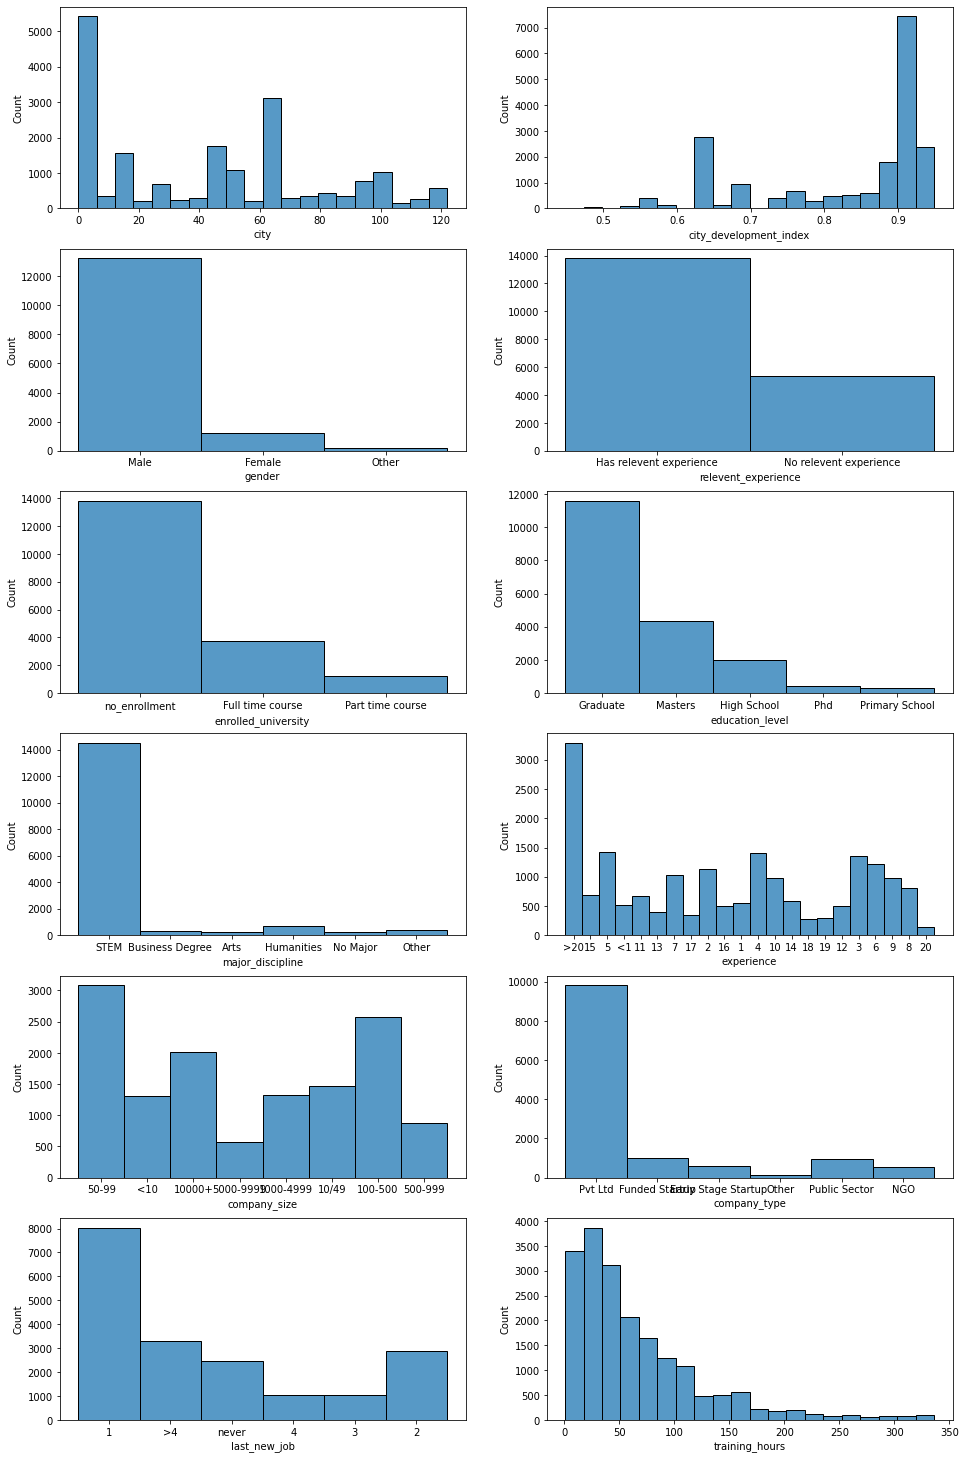

In [115]:
fig, ax = plt.subplots(int(len(train.columns)/2), 2, figsize=(16,len(train.columns)*2))
counter = 0
for i in features:
    sns.histplot(data=train, x=i, bins=20, ax=ax[int(counter/2),counter%2])
    counter +=1 
fig.show()

<AxesSubplot:xlabel='city_development_index', ylabel='Count'>

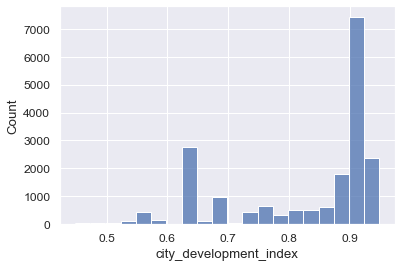

In [ ]:
sns.histplot(data=train, x='city_development_index', bins=20)

<AxesSubplot:xlabel='training_hours', ylabel='Count'>

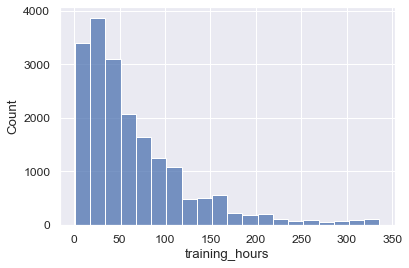

In [88]:
sns.histplot(data=train, x='training_hours', bins=20)

### Categorical Features and Target Comparison

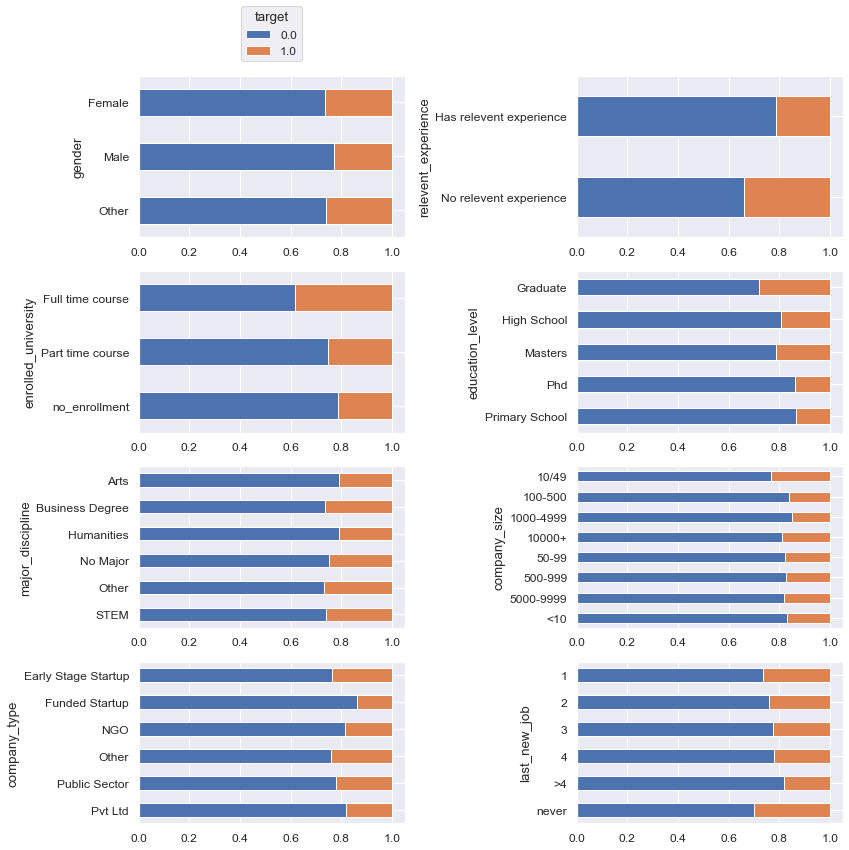

In [89]:
# We add a categorical value columns
cols_to_plot = [
    'gender',
    'relevent_experience',
    'enrolled_university',
    'education_level',
    'major_discipline',
    'company_size',
    'company_type',
    'last_new_job']

fig, ax = plt.subplots(int(len(cols_to_plot)/2), 2, figsize=(12,len(cols_to_plot)*(1.5)))
for idx, col in enumerate(cols_to_plot):
    rowIndex = int(idx/2)
    colIndex = idx % 2
    counts = (train[['target', col]].groupby(['target', col]).size().unstack('target'))
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')
    props.plot(kind="barh", stacked=True, ax=ax[rowIndex, colIndex])
    ax[rowIndex, colIndex].invert_yaxis()
    ax[rowIndex, colIndex].legend().remove()
    
ax[0, 0].legend( loc='lower center', bbox_to_anchor=(0.5, 1.05), title='target')
fig.tight_layout()

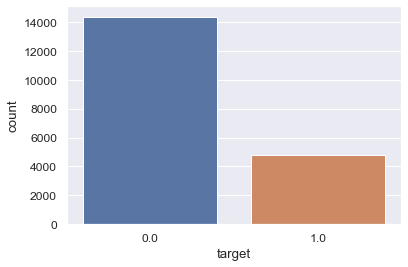

In [90]:
sns.countplot(x=train.target, data=train);

### Correlation Matrix

In [91]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

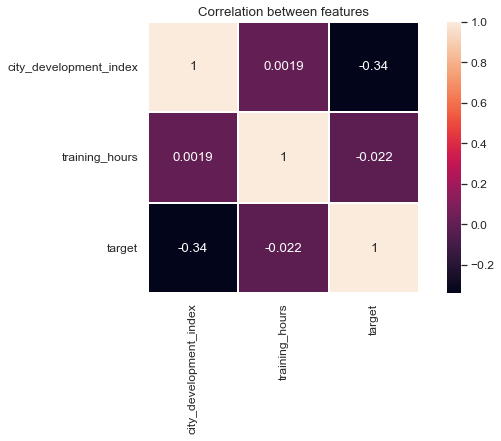

In [284]:
corrMatrix=train[["city_development_index","training_hours","target"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 5))
sns.heatmap(corrMatrix, linewidths=0.01,square=True,annot=True)
plt.title('Correlation between features');

### Analysis of Data Distribution

##### Categorical Values Analysis

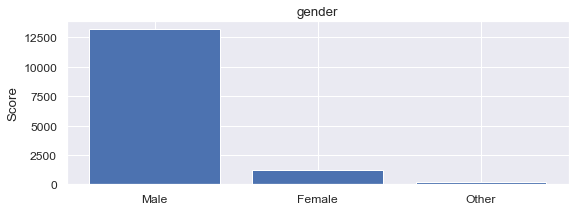

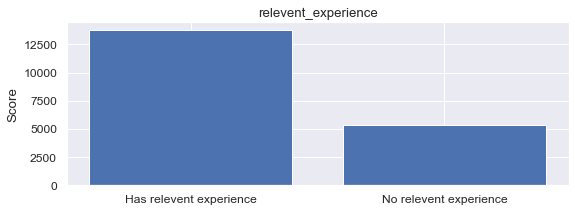

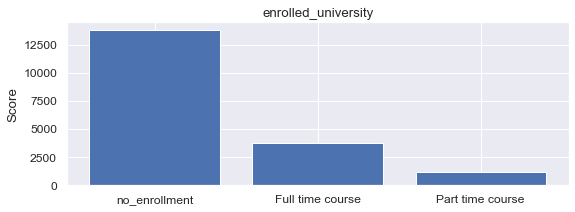

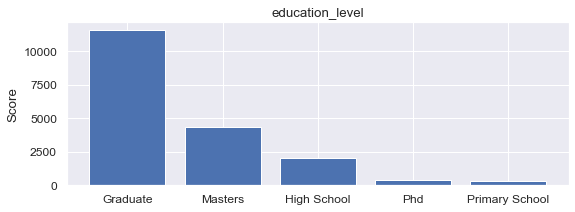

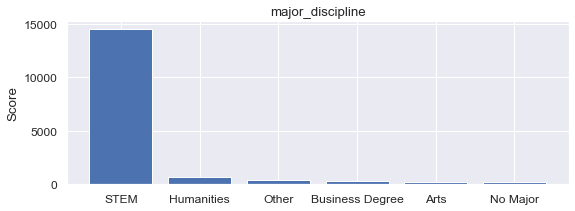

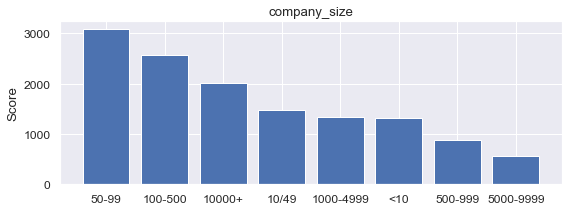

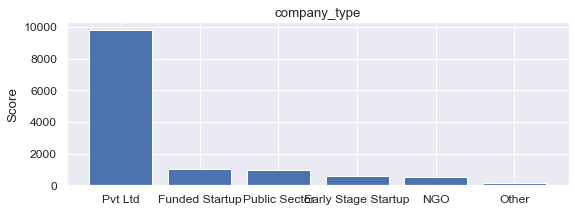

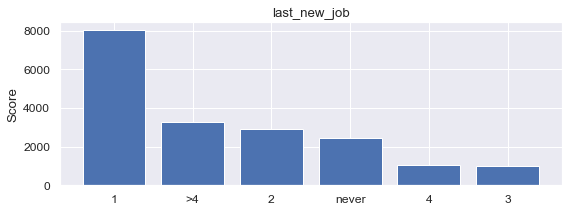

In [93]:
variable = cols_to_plot
for c in cols_to_plot:
    var = train[c]
    varValue = var.value_counts()
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.ylabel("Score")
    plt.title(c)
    plt.show()

##### Finding Missing Values

In [3]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [4]:
null_cols = train.isnull().sum()
list(train.columns[null_cols>0])

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [5]:
train.drop('enrollee_id', inplace=True, axis=1)
test.drop('enrollee_id', inplace=True, axis=1)

In [122]:
train['city'] = pd.Categorical(train['city']).codes
test['city'] = pd.Categorical(test['city']).codes

In [7]:
city_data = np.array([train.city,train.city_development_index]).T
city_data_test = np.array([test.city,test.city_development_index]).T

In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 12 , init = 'random', n_init=10, max_iter=500 , tol = 1e-04, random_state = 0)

km.fit(city_data)
y_pred = km.predict(city_data)

In [124]:
km_test = KMeans(n_clusters = 12 , init = 'random', n_init=10, max_iter=500 , tol = 1e-04, random_state = 0)

km_test.fit(city_data_test)
y_pred_test = km_test.predict(city_data_test)

In [9]:
train_mice = train.copy()
train_mice.drop('city', inplace=True, axis=1)
train_mice.insert(0, 'city', y_pred, True)

In [138]:
test_mice = test.copy()
test_mice.drop('city', inplace=True, axis=1)
test_mice.insert(0, 'city', y_pred_test, True)

In [10]:
train_mice.drop('target', inplace=True, axis=1)

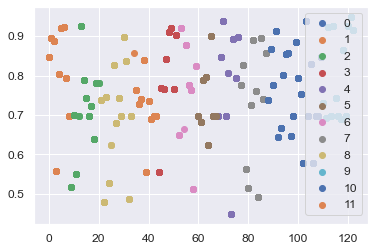

In [338]:
u_labels = np.unique(y_pred)
 
for i in u_labels:
    plt.scatter(city_data[y_pred == i , 0] , city_data[y_pred == i , 1] , label = i)
plt.legend()
plt.show()

In [104]:
cols_to_plot

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_size',
 'company_type',
 'last_new_job']

In [11]:
train_mice['enrolled_university'] = train_mice['enrolled_university'].map({'no_enrollment':int(0),'Full time course':int(1) ,'Part time course':int(-1)})
train_mice['education_level'] = train_mice['education_level'].map({'Graduate':int(0),'Masters':int(1) ,'High School':int(-1),'Phd':int(2),'Primary School':int(3)})
train_mice['experience'] = train_mice['experience'].map({'>20':int(20), '15':int(15),  '5':int(5), '<1':int(-1), '11':int(11), 
                                               '13':int(13), '7':int(7), '17':int(17),
                                               '2':int(2), '16':int(16), '1':int(1), '4':int(4), '10':int(10),
                                               '14':int(14), '18':int(18),'19':int(19), '12':int(12), '3':int(3), 
                                               '6':int(6), '9':int(9), '8':int(8), '20':int(20)})

train_mice['company_size'] = train_mice['company_size'].map({'50-99':int(0), '<10':int(-1), '10000+':int(1), '5000-9999':int(2), 
                                                   '1000-4999':int(3), '10/49':int(4), '100-500':int(5),'500-999':int(6)})
train_mice['company_type'] = train_mice['company_type'].map({'Pvt Ltd':int(0), 'Funded Startup':int(-1), 'Early Stage Startup':int(2), 'Other':int(3),'Public Sector':int(4), 'NGO':int(5)})
train_mice['last_new_job'] = train_mice['last_new_job'].map({'1':int(-1), '>4':int(0), 'never':int(1), '4':int(4), '3':int(3), '2':int(2)})
train_mice['relevent_experience'] = train_mice['relevent_experience'].map({'Has relevent experience':int(1) ,'No relevent experience':int(0)})

In [140]:
test_mice['enrolled_university'] = test_mice['enrolled_university'].map({'no_enrollment':int(0),'Full time course':int(1) ,'Part time course':int(-1)})
test_mice['education_level'] = test_mice['education_level'].map({'Graduate':int(0),'Masters':int(1) ,'High School':int(-1),'Phd':int(2),'Primary School':int(3)})
test_mice['experience'] = test_mice['experience'].map({'>20':int(20), '15':int(15),  '5':int(5), '<1':int(-1), '11':int(11), 
                                               '13':int(13), '7':int(7), '17':int(17),
                                               '2':int(2), '16':int(16), '1':int(1), '4':int(4), '10':int(10),
                                               '14':int(14), '18':int(18),'19':int(19), '12':int(12), '3':int(3), 
                                               '6':int(6), '9':int(9), '8':int(8), '20':int(20)})

test_mice['company_size'] = test_mice['company_size'].map({'50-99':int(0), '<10':int(-1), '10000+':int(1), '5000-9999':int(2), 
                                                   '1000-4999':int(3), '10/49':int(4), '100-500':int(5),'500-999':int(6)})
test_mice['company_type'] = test_mice['company_type'].map({'Pvt Ltd':int(0), 'Funded Startup':int(-1), 'Early Stage Startup':int(2), 'Other':int(3),'Public Sector':int(4), 'NGO':int(5)})
test_mice['last_new_job'] = test_mice['last_new_job'].map({'1':int(-1), '>4':int(0), 'never':int(1), '4':int(4), '3':int(3), '2':int(2)})
test_mice['relevent_experience'] = test_mice['relevent_experience'].map({'Has relevent experience':int(1) ,'No relevent experience':int(0)})

In [12]:
train_mice = pd.get_dummies(train_mice, columns = ['gender','major_discipline','city'])

In [141]:
test_mice = pd.get_dummies(test_mice, columns = ['gender','major_discipline','city'])

In [142]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}


def integer_encode(df , variable, ordinal_mapping):
    df[variable] = df[variable].map(ordinal_mapping)

mappin = dict()
def imputation(df1 , cols):
    df = df1.copy()

    for variable in cols:
        mappings = find_category_mappings(df, variable)
        mappin[variable] = mappings

    for variable in cols:
        integer_encode(df, variable, mappin[variable])  

    sca = mm.fit_transform(df)
    knn_imputer = KNNImputer()
    knn = knn_imputer.fit_transform(sca)
    df.iloc[:,:] = mm.inverse_transform(knn)
    for i in df.columns : 
        df[i] = round(df[i]).astype('int')

    for i in cols:
        inv_map = {v: k for k, v in mappin[i].items()}
        df[i] = df[i].map(inv_map)
    return df


train_mice = imputation(train_mice,train_mice.columns)
test_mice = imputation(test_mice,test_mice.columns)

C:\Users\ahmet\AppData\Local\Temp\ipykernel_7792\2205839708.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


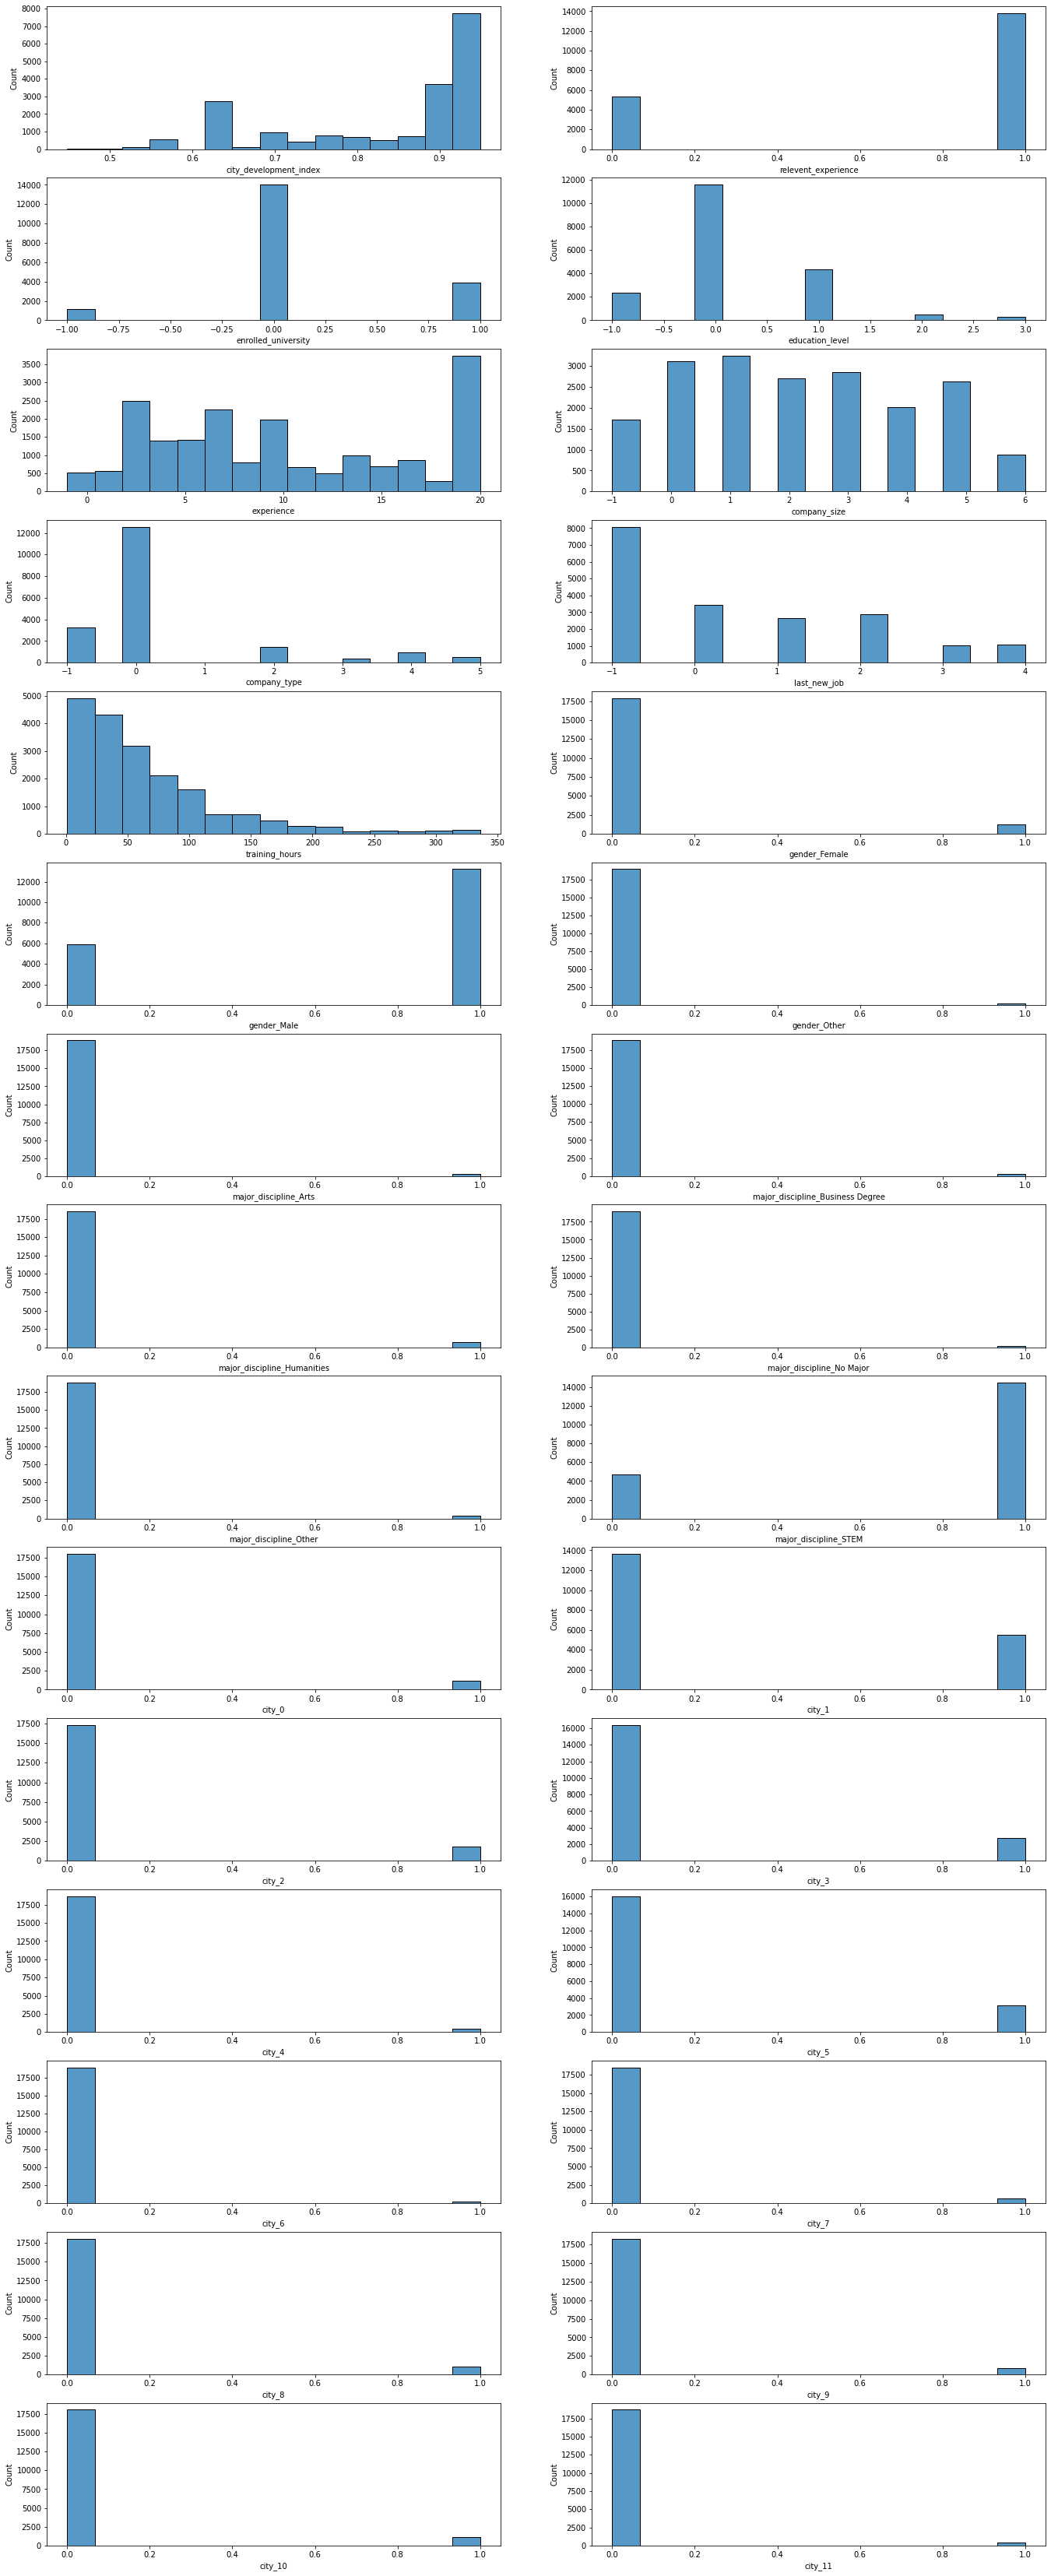

In [120]:
fig, ax = plt.subplots(int(len(train_mice.columns)/2), 2, figsize=(23,len(train_mice.columns)*2))
counter = 0
for i in train_mice.columns:
    sns.histplot(data=train_mice, x=i, bins=15, ax=ax[int(counter/2),counter%2])
    counter +=1 
fig.show()

## Learning

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score, f1_score, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, classification_report, precision_score, recall_score

In [257]:
# Our data is unbalanced, we can fix this with SMOTE

from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state = 402)
X, y = oversample.fit_resample(train_mice, train.target)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=80)

In [258]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

<AxesSubplot:ylabel='Count'>

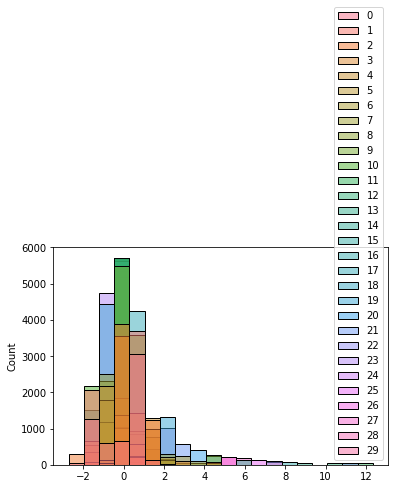

In [259]:
sns.histplot(data=X_test, bins=20)

## Logistic Regression

In [76]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_proba = lr.predict_proba(X_test)[:, 1]
y_pred_lr = lr.predict(X_test)
# print(classification_report(y_test, y_pred_lr))

In [77]:
score = accuracy_score(y_test,y_pred_lr)
print("Test Accuracy Score", score)

Test Accuracy Score 0.8133147922822875


In [78]:
df_report = pd.DataFrame(columns={'ROC-AUC'}, data=[0])

df_report['ROC-AUC'] = roc_auc_score(y_test, y_pred_proba)
df_report['F1'] = f1_score(y_test, y_pred_lr)
df_report['precision_0'] = precision_score(y_test, y_pred_lr, pos_label=0)
df_report['recall_0'] = recall_score(y_test, y_pred_lr, pos_label=0)
df_report['precision_1'] = precision_score(y_test, y_pred_lr, pos_label=1)
df_report['recall_1'] = recall_score(y_test, y_pred_lr, pos_label=1)

df_report.index = ['LogisticRegression']

In [79]:
df_report

,ROC-AUC,F1,precision_0,recall_0,precision_1,recall_1
LogisticRegression,0.878802,0.796591,0.78037,0.880684,0.857667,0.743635


In [80]:
param_grid = {
    "max_depth": [3, 4, 5, 7, 8],
    "learning_rate": [0.1, 0.01, 0.001],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

## XGBoost Classifier

In [251]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(objective="binary:logistic")
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

_ = grid_cv.fit(X_train, y_train)


In [252]:
print(grid_cv.best_estimator_)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
0.9250930608506822
{'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 8, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.8}


In [253]:
y_train_pred = grid_cv.best_estimator_.predict_proba(X_train)
y_train_pred_pos = y_train_pred[:,1]

y_val_pred = grid_cv.best_estimator_.predict_proba(X_test)
y_val_pred_pos = y_val_pred[:,1]

auc_train = roc_auc_score(y_train, y_train_pred_pos)
auc_test = roc_auc_score(y_test, y_val_pred_pos)

In [226]:
print("XGBClassifier Model Accuracy : ",round(auc_test,2))

XGBClassifier Model Accuracy :  0.92


In [260]:
y_pred_xgb =  grid_cv.best_estimator_.predict(X_test)
cm_xgb = confusion_matrix(y_pred_xgb,y_test)
fscore = f1_score(y_test,y_pred_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("RESULTS : ")
print("XGBClassifier Model Accuracy : ",round(acc_xgb,2))
print("XGBClassifier Model F1-score : ",round(fscore,2))
print("Classification Report :\n",classification_report(y_test,y_pred_xgb))

RESULTS : 
XGBClassifier Model Accuracy :  0.85
XGBClassifier Model F1-score :  0.84
Classification Report :
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      2925
         1.0       0.87      0.82      0.84      2828

    accuracy                           0.85      5753
   macro avg       0.85      0.85      0.85      5753
weighted avg       0.85      0.85      0.85      5753



## CatBoost

In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier()

grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5)
gscv.fit(X,y)


print(gscv.best_estimator_)
print(gscv.best_score_)
print(gscv.best_params_)

In [ ]:
y_pred_cb = gscv.best_estimator_.predict(X_test)
cm_cb = confusion_matrix(y_pred_cb,y_test)
fscore = f1_score(y_test,y_pred_cb)
acc_cb = accuracy_score(y_test, y_pred_cb)
print("RESULTS : ")
print("CatBoost Model Accuracy : ",round(acc_cb,2))
print("CatBoost Model F1-score : ",round(fscore,2))
print("Classification Report :\n",classification_report(y_test,y_pred_cb))

## RandomForestClassifier

In [88]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1000, verbose=0,
            warm_start=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

c:\Users\ahmet\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [89]:
score = accuracy_score(y_test,y_pred)
print("Test Accuracy Score", score)

Test Accuracy Score 0.8484269077003302


In [ ]:
base_model = RandomForestClassifier()
criterion = ['gini', 'entropy']
max_depth = [2, 5, 10, 20]
max_leaf_nodes = [2, 5, 10, 20]
bootstrap = [True, False]
n_estimators = [10, 25, 50, 100, 200, 500]
params = {'criterion':criterion, 'max_depth':max_depth, 'max_leaf_nodes':max_leaf_nodes, 'bootstrap':bootstrap, 'n_estimators':n_estimators}
grid = GridSearchCV(base_model, params, cv=5)
grid.fit(X_train, y_train)

In [92]:
grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 20,
 'max_leaf_nodes': 20,
 'n_estimators': 50}

In [93]:
y_pred_rf = grid.predict(X_test)
cm_xgb = confusion_matrix(y_pred_rf,y_test)
fscore = f1_score(y_test,y_pred_rf)
acc_xgb = accuracy_score(y_test, y_pred_rf)

In [94]:
print("RESULTS : ")
print("RandomForest Model Accuracy : ",round(acc_xgb,2))
print("RandomForest Model F1-score : ",round(fscore,2))
print("Classification Report :\n",classification_report(y_test,y_pred_rf))

RESULTS : 
RandomForest Model Accuracy :  0.79
RandomForest Model F1-score :  0.78
Classification Report :
               precision    recall  f1-score   support

         0.0       0.78      0.81      0.80      2925
         1.0       0.80      0.76      0.78      2828

    accuracy                           0.79      5753
   macro avg       0.79      0.79      0.79      5753
weighted avg       0.79      0.79      0.79      5753



In [95]:
#returns the best score
print(grid.best_score_)

0.7996870094468627
